In [ ]:
# source: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import xlrd
import numpy as np
import scipy.io as sio

In [ ]:
# Load Iris Dataset - into Pandas DataFrame
path = '/content/drive/MyDrive/SLD_data.mat'
mat = sio.loadmat(path)

# Labels
Labels = np.concatenate([mat['pos_labels'], mat['neg_labels']], axis = 1)
Labels = np.reshape(Labels, (162))
print('Labels shape:  ', Labels.shape)

# Patterns
Patterns = np.vstack([mat['pos_patterns'], mat['neg_patterns']])
Patterns = np.reshape(Patterns, (162, 20))
#P_1 = Patterns[:, 15:20]
#P_11 = Patterns[:, 15:20]
#P_2 = Patterns[:, 15:20]
#P_22 = Patterns[:, 15:20]
#Patterns = P_1
#Patterns = np.concatenate((P_1, P_2), axis = 1)
print(Patterns)
print('Patterns shape:', Patterns.shape)

Labels shape:   (162,)
[[0.9461363  0.9219642  0.9234869  ... 0.7204035  0.7270651  0.6891378 ]
 [0.9464288  0.92323434 0.8800553  ... 0.58814555 0.58591336 0.5584831 ]
 [0.9303256  0.8950737  0.8609297  ... 0.5615633  0.54567564 0.51049143]
 ...
 [0.95297045 0.8009956  0.7453734  ... 0.49276382 0.46470308 0.4624024 ]
 [0.9284665  0.84427387 0.78103507 ... 0.44130027 0.43310955 0.39512616]
 [0.9414874  0.8907783  0.8267776  ... 0.4726291  0.45602193 0.43005484]]
Patterns shape: (162, 20)


In [ ]:
# Standardizing Data
x = StandardScaler().fit_transform(Patterns)
print('x shape:', x.shape)

x shape: (162, 20)


In [ ]:
# PCA Projection to 2D
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal component 1', 'Principal component 2'])
LabelsDf = pd.DataFrame(data = Labels, columns = ['Labels'])

finalDf = pd.concat([principalDf, LabelsDf], axis = 1)
print(finalDf)

     Principal component 1  Principal component 2  Labels
0                -6.997299              -2.136570     1.0
1                -4.470572              -0.781602     1.0
2                -1.665376              -0.741708     1.0
3                -4.073267              -0.530336     1.0
4                -0.741020              -2.167807     1.0
..                     ...                    ...     ...
157               6.315458               0.613456     0.0
158               2.681577              -0.152451     0.0
159               2.323037              -1.821803     0.0
160               3.156891              -0.556151     0.0
161               1.065445               0.040742     0.0

[162 rows x 3 columns]


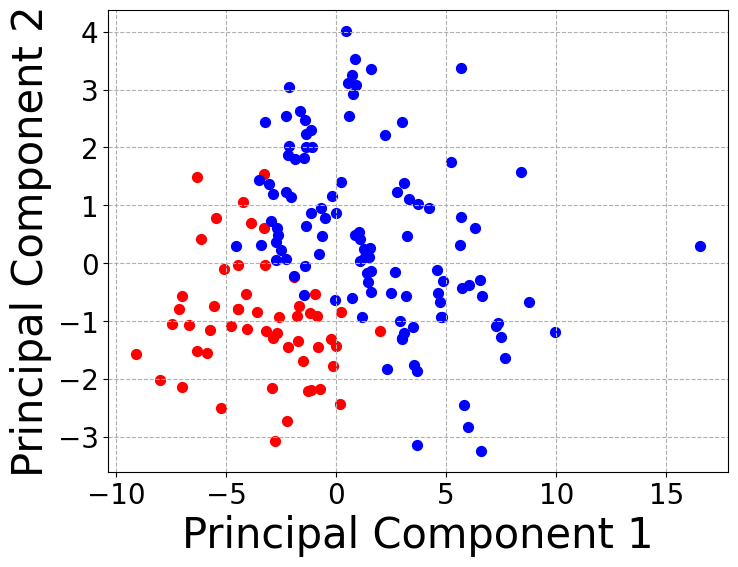

In [ ]:
# Visualize 2D Projection
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 30)
ax.set_ylabel('Principal Component 2', fontsize = 30)
#ax.set_title('2 component - PCA for SLD classification', fontsize = 30)
targets = [1, 0]
colors = ['r', 'b']
samples = ['BV+', 'BV -']

for target, color, sample in zip(targets, colors,samples):
    indicesToKeep = finalDf['Labels'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal component 1'],
               finalDf.loc[indicesToKeep, 'Principal component 2'],
               c = color,
               s = 50,
               label = sample)
#ax.legend(fontsize = 35)
ax.grid(linestyle = '--')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
# Explained Variance
pca.explained_variance_ratio_

array([0.82874334, 0.11657061], dtype=float32)